In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
import plotly.express as px
import osmnx as ox

## Importación de BBDD

### Manzanas

In [2]:
manzanas = gpd.read_file('data/lima_manzanas.gpkg')

In [3]:
print(manzanas.shape)
manzanas.head()

(124903, 31)


,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A,T_TOTAL,T_HOMBRES,T_MUJERES,...,CCPP,CCDI,NOMBDIST,CAPITAL,CODIGO,CNT_CCPP,DESCRIPCIO,layer,path,geometry
0,150102000102100023,150102,1,0001,02100,023,None,18.0,7.0,11.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723..."
1,150102000101101010,150102,1,0001,01101,010,None,31.0,14.0,17.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151..."
2,150102000100600037,150102,1,0001,00600,037,None,71.0,32.0,39.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981..."
3,150102000101202048,150102,1,0001,01202,048,None,12.0,5.0,7.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140..."
4,150102000101202010A,150102,1,0001,01202,010,A,2.0,0.0,2.0,...,01,02,ANCON,ANCON,150102,1.0,ANCON,ANCON_LIMA_150102_Manzanas_Poblacion_JuanPablo...,C:/Users/Abril/Desktop/IEP/MAPAS/Manzanas/ANCO...,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255..."


### Demanda

In [4]:
demanda = pd.read_csv("data/BBDD Perú demanda/1_limamet_pob0a5_mz.csv")
print(demanda.shape)
demanda.head()

(92787, 11)


,id,ubigeo,nombdist,cod_mz,pob0a5_mz,pob0a5_dist,pob0a3_mz,pob0a3_dist,pob4a5_mz,pob4a5_dist,geom
0,45548.0,150125,PUENTE PIEDRA,150125000103300030O,7,46940,4.0,30716,3.0,16225,0106000020E6100000010000000103000000010000000C...
1,45561.0,150125,PUENTE PIEDRA,150125000101000052,16,46940,10.0,30716,5.0,16225,0106000020E61000000100000001030000000100000007...
2,45566.0,150125,PUENTE PIEDRA,150125000103600034E,9,46940,8.0,30716,1.0,16225,0106000020E61000000100000001030000000100000010...
3,45569.0,150125,PUENTE PIEDRA,150125000100900035,8,46940,4.0,30716,4.0,16225,0106000020E61000000100000001030000000100000008...
4,45573.0,150125,PUENTE PIEDRA,150125000101300014C,21,46940,10.0,30716,10.0,16225,0106000020E61000000100000001030000000100000032...


In [5]:
demanda.columns

Index(['id', 'ubigeo', 'nombdist', 'cod_mz', 'pob0a5_mz', 'pob0a5_dist',
       'pob0a3_mz', 'pob0a3_dist', 'pob4a5_mz', 'pob4a5_dist', 'geom'],
      dtype='object')

In [6]:
demanda_reduc = demanda[[ 'cod_mz', 'pob0a5_mz', 'pob0a5_dist',
       'pob0a3_mz', 'pob0a3_dist', 'pob4a5_mz', 'pob4a5_dist']]
manzanas_merged = pd.merge(manzanas, demanda_reduc, left_on="Mz", right_on="cod_mz", how="left")

manzanas_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 126043 entries, 0 to 126042
Data columns (total 38 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Mz           126043 non-null  object  
 1   UBIGEO       126043 non-null  object  
 2   AREA         126043 non-null  object  
 3   CODCCPP      126043 non-null  object  
 4   ZONA         126043 non-null  object  
 5   MANZANA_ID   123291 non-null  object  
 6   MANZANA_A    46601 non-null   object  
 7   T_TOTAL      126043 non-null  float64 
 8   T_HOMBRES    126043 non-null  float64 
 9   T_MUJERES    126043 non-null  float64 
 10  LLAVE_MZS    126043 non-null  object  
 11  contacto     126043 non-null  object  
 12  descargar    126043 non-null  object  
 13  whatsapp     126043 non-null  float64 
 14  NOMBDEP      126043 non-null  object  
 15  NOMBPROV     126043 non-null  object  
 16  IDPROV       126043 non-null  object  
 17  ARCHIVO      126043 non-null  object  
 

### Oferta

In [8]:
oferta = pd.read_excel("data/BBDD Perú oferta/padron_consolidado_completo_0a5_modif.xlsx", sheet_name="combinado", usecols=["nombre", "nlatie", "nlongie", "lat", "lng"])

oferta["nlatie"].fillna(oferta["lat"], inplace=True)
oferta["nlongie"].fillna(oferta["lng"], inplace=True)

cols_drop = ["lat", "lng"]
oferta.drop(cols_drop, axis=1, inplace=True)
newnames = {'nlatie':'lat',
            'nlongie':'lng'}
oferta.rename(columns=newnames, inplace=True)
print(oferta.shape)
oferta.head()

(19960, 3)


,nombre,lat,lng
0,20915,-12.222213,-76.84330
1,534,-12.294030,-76.85290
2,6012,-12.244750,-76.85715
3,6061 CORONEL FRANCISCO BOLOGNESI,-12.237720,-76.87031
4,655,-12.237070,-76.91066


### Tiempos de viaje

El dataset contiene 2 variables:  
0 corresponde a la distancia  
1 corresponde a la duración del recorrido  

In [10]:
tiempos = pd.read_csv("data/BBDD Perú accesibilidad/distance_duration_0a5.csv")
print(tiempos.shape)
tiempos.head()

(124903, 2)


,0,1
0,5125.7,3694.8
1,515.1,370.9
2,369.8,266.2
3,359.1,258.5
4,1316.7,948.4


#### Matcheo de bases a manzanas

In [11]:
manzanas_merged['distancia_a_centro_05'] =  tiempos["0"] / 1000 # metros a km
manzanas_merged['duracion_a_centro_05'] = tiempos["1"] / 60 # segundos a minutos

### Pobreza

In [13]:
pobreza = pd.read_csv("data/BBDD pobreza/peru_estratos_ingresos.csv")
print(pobreza.shape)
pobreza.head()

(98911, 10)


,FID,idmanzana,Ubigeo,Departamento,Provincia,Distrito,Hogares,Población,Estrato,geom
0,peru_estratos_ingresos.14645,150106092000020,150106,LIMA,LIMA,CARABAYLLO,4,10,2,MULTIPOLYGON (((-77.02289224399993 -11.8951647...
1,peru_estratos_ingresos.14646,150106092000010,150106,LIMA,LIMA,CARABAYLLO,31,129,2,MULTIPOLYGON (((-77.02352222499997 -11.8947903...
2,peru_estratos_ingresos.14647,150106035000100,150106,LIMA,LIMA,CARABAYLLO,14,50,1,MULTIPOLYGON (((-77.07526241299996 -11.8439180...
3,peru_estratos_ingresos.14648,150106092000450,150106,LIMA,LIMA,CARABAYLLO,32,149,2,MULTIPOLYGON (((-77.02031777899998 -11.8968804...
4,peru_estratos_ingresos.14649,150106092000080,150106,LIMA,LIMA,CARABAYLLO,55,263,2,MULTIPOLYGON (((-77.02249469799995 -11.8977410...


In [14]:
from shapely import wkt
import geopandas as gpd

# Convert the 'geom' column from WKT to shapely objects
pobreza['geom'] = pobreza['geom'].apply(wkt.loads)

# Now create the GeoDataFrame
gdf = gpd.GeoDataFrame(pobreza, geometry='geom')

manzanas_merged = pd.merge(manzanas_merged, gdf[["idmanzana", "Hogares", "Población", "Estrato", "geom"]], left_on='geometry', right_on="geom", how="left")
print(manzanas_merged.shape)
manzanas_merged.head()

(126043, 45)


,Mz,UBIGEO,AREA,CODCCPP,ZONA,MANZANA_ID,MANZANA_A,T_TOTAL,T_HOMBRES,T_MUJERES,...,pob0a3_dist,pob4a5_mz,pob4a5_dist,distancia_a_centro_05,duracion_a_centro_05,idmanzana,Hogares,Población,Estrato,geom
0,150102000102100023,150102,1,0001,02100,023,None,18.0,7.0,11.0,...,7220.0,2.0,3703.0,5.1257,61.580000,150102021000230,7.0,18.0,2.0,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723..."
1,150102000101101010,150102,1,0001,01101,010,None,31.0,14.0,17.0,...,7220.0,3.0,3703.0,0.5151,6.181667,150102011010100,9.0,31.0,1.0,"MULTIPOLYGON (((-77.15185 -11.73780, -77.15151..."
2,150102000100600037,150102,1,0001,00600,037,None,71.0,32.0,39.0,...,7220.0,2.0,3703.0,0.3698,4.436667,150102006000370,20.0,71.0,2.0,"MULTIPOLYGON (((-77.16978 -11.77796, -77.16981..."
3,150102000101202048,150102,1,0001,01202,048,None,12.0,5.0,7.0,...,7220.0,NaN,3703.0,0.3591,4.308333,150102012020480,4.0,12.0,1.0,"MULTIPOLYGON (((-77.15222 -11.74137, -77.15140..."
4,150102000101202010A,150102,1,0001,01202,010,A,2.0,0.0,2.0,...,NaN,NaN,NaN,1.3167,15.806667,15010201202010A,1.0,2.0,3.0,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255..."


In [15]:
manzanas_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 126043 entries, 0 to 126042
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   Mz                     126043 non-null  object  
 1   UBIGEO                 126043 non-null  object  
 2   AREA                   126043 non-null  object  
 3   CODCCPP                126043 non-null  object  
 4   ZONA                   126043 non-null  object  
 5   MANZANA_ID             123291 non-null  object  
 6   MANZANA_A              46601 non-null   object  
 7   T_TOTAL                126043 non-null  float64 
 8   T_HOMBRES              126043 non-null  float64 
 9   T_MUJERES              126043 non-null  float64 
 10  LLAVE_MZS              126043 non-null  object  
 11  contacto               126043 non-null  object  
 12  descargar              126043 non-null  object  
 13  whatsapp               126043 non-null  float64 
 14  NOMBDEP     

# Modelaje

## Opción 1 - Clasificación mediante aprendizaje no supervisado

Agrupación de grupos en clusters - k medias

+ Preprocesamiento

In [33]:
df = pd.DataFrame(manzanas_merged.drop(columns=['Mz', 'UBIGEO', 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A',  'LLAVE_MZS', 'contacto',
       'descargar', 'whatsapp', 'NOMBDEP', 'NOMBPROV', 'IDPROV', 'ARCHIVO',
       'Nombre', 'Apellido', 'CCDD', 'CCPP', 'CCDI', 'NOMBDIST', 'CAPITAL',
       'CODIGO', 'CNT_CCPP', 'DESCRIPCIO', 'layer', 'path', 'idmanzana',
       'geom', 'T_TOTAL', 'cod_mz', 'T_HOMBRES', 'T_MUJERES', 'pob0a3_dist', 'pob4a5_dist', 'pob0a5_dist']))

# Dejo geometry para dropear despues de quitar nulls

In [35]:
df['pob0a5_mz'] = df['pob0a5_mz'].fillna(0)
df['pob0a3_mz'] = df['pob0a3_mz'].fillna(0)
df['pob4a5_mz'] = df['pob4a5_mz'].fillna(0)
df = df.dropna()


+ Scaling

In [82]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['distancia_a_centro_05', 'duracion_a_centro_05',
       'pob0a5_mz', 'pob0a3_mz', 'pob4a5_mz', 'Población',
       'Estrato']  

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[columns_to_scale])



k-means study with Elbow method

In [83]:
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 10)  # Adjust the range of k to suit your data

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    inertia.append(model.inertia_)


c:\Users\danid\anaconda3\envs\accesibility_undp\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\danid\anaconda3\envs\accesibility_undp\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\danid\anaconda3\envs\accesibility_undp\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\danid\anaconda3\envs\accesibility_undp\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureW

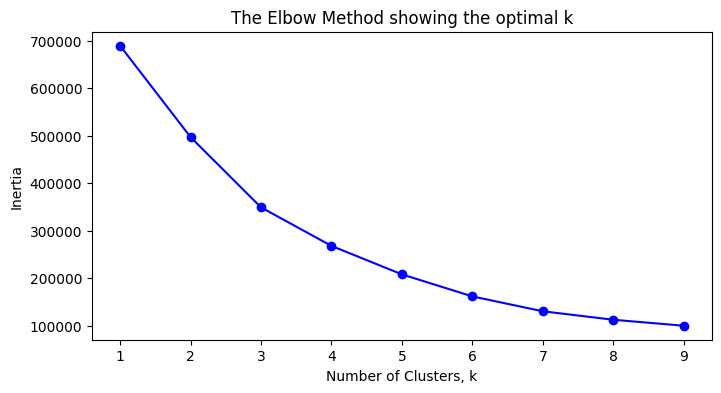

In [84]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [85]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_scaled)
clusters = kmeans.labels_

df['cluster'] = clusters



c:\Users\danid\anaconda3\envs\accesibility_undp\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [86]:
df.cluster.value_counts()

cluster
1    57726
3    26220
0    14561
2       18
4       15
Name: count, dtype: int64

In [87]:
centroids = kmeans.cluster_centers_


In [88]:
df[columns_to_scale + ['cluster']].groupby('cluster').mean()


,distancia_a_centro_05,duracion_a_centro_05,pob0a5_mz,pob0a3_mz,pob4a5_mz,Población,Estrato
cluster,,,,,,,
0,0.252157,3.027419,29.739510,19.123206,10.636220,262.257469,2.822677
1,0.501212,6.016461,5.990420,3.896823,2.026608,44.548592,1.413834
2,0.317644,3.817315,527.388889,351.722222,175.722222,4011.388889,3.944444
3,0.329390,3.957471,7.666323,4.962471,2.657018,92.406751,3.625133
4,760.971813,9299.486444,6.866667,4.266667,2.466667,70.266667,3.000000


In [ ]:
df[columns_to_scale + ['cluster']].mean()

distancia_a_centro_05     0.534418
duracion_a_centro_05      6.441185
pob0a5_mz                10.041070
pob0a3_mz                 6.493931
pob4a5_mz                 3.498366
Población                90.181723
Estrato                   2.211112
cluster                   1.385042
dtype: float64

Descripción:
+ **0**: más cercano a centros, menor a la media; más demanda que la media, más población que la media; estrato medio. 3er cluster en tamaño.
+ **1**: distancia a centros media (6 minutos), menor demanda y menor población (50% de la media). Estrato de ingresos bajo. Cluster más numeroso.
+  **2**: Cluster no relevante en tamaño (18 casos). Centros muy cercanos, muy alta demanda y gran cantidad de población. Estrato alto.
+ **3**: Más cerca de los centros que la media, demanda cercana a la media. Estrato alto. Segundo cluster en tamaño.
+ **4**: Cluster no relevante en tamaño (15 casos). Muy lejanos a centros de cuidado, baja demanda, estrato medio.

In [89]:
geopan = gpd.GeoDataFrame(df, geometry='geometry')

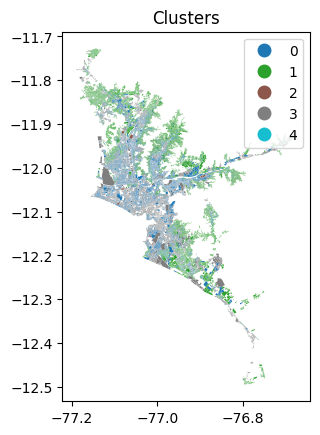

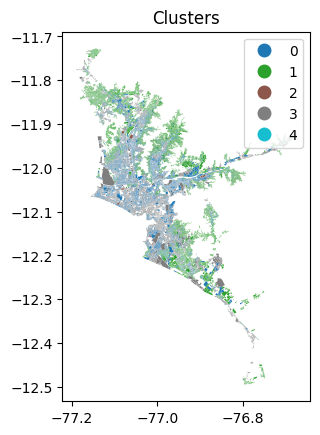

In [ ]:
fig, ax = plt.subplots(1, 1)

geopan.plot(column='cluster', ax=ax, legend=True, categorical=True)

ax.set_title('Clusters')

plt.show()

El contexto heterogéneo hace difícil la clasificación por clusters - no hay una clara definición de desiertos de cuidado.

## Opción 2: Tipología empírica usando media y desviaciones estándar

In [33]:
df = pd.DataFrame(manzanas_merged.drop(columns=['Mz', 'UBIGEO', 'AREA', 'CODCCPP', 'ZONA', 'MANZANA_ID', 'MANZANA_A',  'LLAVE_MZS', 'contacto',
       'descargar', 'whatsapp', 'NOMBDEP', 'NOMBPROV', 'IDPROV', 'ARCHIVO',
       'Nombre', 'Apellido', 'CCDD', 'CCPP', 'CCDI', 'NOMBDIST', 'CAPITAL',
       'CODIGO', 'CNT_CCPP', 'DESCRIPCIO', 'layer', 'path', 'idmanzana',
       'geom', 'T_TOTAL', 'cod_mz', 'T_HOMBRES', 'T_MUJERES', 'pob0a3_dist', 'pob4a5_dist', 'pob0a5_dist']))

# Dejo geometry para dropear despues de quitar nulls

df['pob0a5_mz'] = df['pob0a5_mz'].fillna(0)
df['pob0a3_mz'] = df['pob0a3_mz'].fillna(0)
df['pob4a5_mz'] = df['pob4a5_mz'].fillna(0)

df = df.dropna()

Identificación de outliers:

In [34]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the travel time
Q1 = df['duracion_a_centro_05'].quantile(0.25)
Q3 = df['duracion_a_centro_05'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['duracion_a_centro_05'] < lower_bound) | (df['duracion_a_centro_05'] > upper_bound)]

print(outliers.shape)
outliers.head()

(8776, 9)


,geometry,pob0a5_mz,pob0a3_mz,pob4a5_mz,distancia_a_centro_05,duracion_a_centro_05,Hogares,Población,Estrato
0,"MULTIPOLYGON (((-77.12763 -11.81363, -77.12723...",3.0,2.0,2.0,5.1257,61.580000,7.0,18.0,2.0
4,"MULTIPOLYGON (((-77.16253 -11.73364, -77.16255...",0.0,0.0,0.0,1.3167,15.806667,1.0,2.0,3.0
6,"MULTIPOLYGON (((-77.15786 -11.73418, -77.15812...",9.0,9.0,0.0,0.8894,10.673333,16.0,42.0,1.0
12,"MULTIPOLYGON (((-77.12769 -11.81433, -77.12737...",6.0,0.0,6.0,5.0932,61.191667,14.0,38.0,2.0
23,"MULTIPOLYGON (((-77.18093 -11.77651, -77.18089...",0.0,0.0,0.0,1.2036,14.445000,1.0,4.0,4.0


<Axes: >

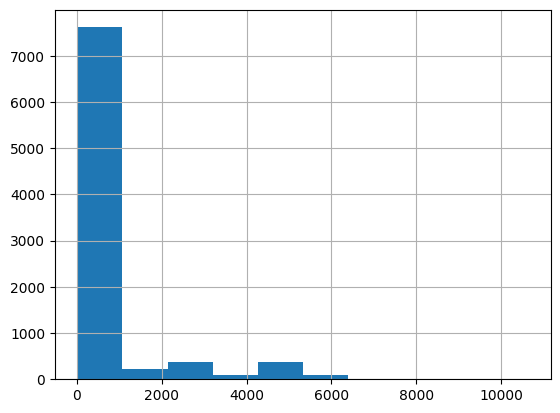

In [35]:
outliers.duracion_a_centro_05.hist()

In [36]:
outliers.describe()

,pob0a5_mz,pob0a3_mz,pob4a5_mz,distancia_a_centro_05,duracion_a_centro_05,Hogares,Población,Estrato
count,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000,8776.000000
mean,7.916363,5.153601,2.705447,40.413136,489.810404,17.712625,64.448154,1.881267
std,11.771667,7.872944,4.318879,108.446026,1318.380601,27.060105,94.557609,1.002236
min,0.000000,0.000000,0.000000,0.803000,10.390000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,0.000000,1.029950,12.365000,5.000000,15.000000,1.000000
50%,5.000000,3.000000,1.000000,1.302500,15.630833,10.000000,34.000000,2.000000
75%,11.000000,7.000000,4.000000,2.310050,27.720833,22.000000,82.000000,2.000000
max,572.000000,382.000000,189.000000,872.525900,10639.055000,1170.000000,3899.000000,5.000000


In [38]:
outliers_manual = df[df["duracion_a_centro_05"]>1000]
outliers_manual


,geometry,pob0a5_mz,pob0a3_mz,pob4a5_mz,distancia_a_centro_05,duracion_a_centro_05,Hogares,Población,Estrato
22853,"MULTIPOLYGON (((-77.15809 -11.83509, -77.15838...",19.0,15.0,4.0,120.8767,1450.441667,28.0,108.0,1.0
30319,"MULTIPOLYGON (((-76.99757 -11.88233, -76.99728...",5.0,3.0,3.0,872.5259,10639.055000,5.0,18.0,1.0
35697,"MULTIPOLYGON (((-77.04476 -11.89491, -77.04460...",29.0,19.0,11.0,90.0614,1081.571667,71.0,244.0,4.0
45402,"MULTIPOLYGON (((-77.00740 -12.05443, -77.00732...",7.0,5.0,2.0,408.5413,4902.510000,39.0,144.0,3.0
65141,"MULTIPOLYGON (((-76.84342 -11.97222, -76.84324...",1.0,1.0,0.0,90.2623,1083.980000,7.0,15.0,2.0
...,...,...,...,...,...,...,...,...,...
124738,"MULTIPOLYGON (((-76.93692 -12.16901, -76.93692...",2.0,0.0,2.0,422.6567,5071.906667,3.0,9.0,1.0
124739,"MULTIPOLYGON (((-76.91812 -12.16638, -76.91813...",6.0,2.0,4.0,414.4342,4973.276667,19.0,54.0,2.0
124740,"MULTIPOLYGON (((-76.91389 -12.20689, -76.91403...",3.0,2.0,1.0,399.2003,4790.445000,12.0,36.0,2.0
124741,"MULTIPOLYGON (((-76.90854 -12.22466, -76.90858...",2.0,2.0,0.0,391.9278,4871.100000,14.0,60.0,3.0


Considerando que las distancias son caminando, es factible tener este número de outliers. Por ahora los dejo dentro de la base.

Scaling:

In [39]:


from sklearn.preprocessing import StandardScaler

columns_to_scale = ['distancia_a_centro_05', 'duracion_a_centro_05',
       'pob0a5_mz', 'pob0a3_mz', 'pob4a5_mz', 'Población',
       'Estrato']  

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[columns_to_scale])

df_scaled = pd.DataFrame(df_scaled, columns=columns_to_scale)

df_scaled.head()

,distancia_a_centro_05,duracion_a_centro_05,pob0a5_mz,pob0a3_mz,pob4a5_mz,Población,Estrato
0,0.037163,0.035827,-0.496495,-0.470746,-0.293573,-0.586202,-0.179101
1,-0.097119,-0.096934,-0.284835,-0.365934,-0.097471,-0.480575,-1.027647
2,-0.101351,-0.101116,-0.073176,0.158124,-0.293573,-0.155567,-0.179101
3,-0.101663,-0.101424,-0.143729,0.158124,-0.685777,-0.634954,-1.027647
4,-0.073773,-0.073868,-0.708154,-0.680369,-0.685777,-0.716206,0.669446


In [45]:
# Calculo de media y desviacion
mean_travel_time = df_scaled['duracion_a_centro_05'].mean()
std_travel_time = df_scaled['duracion_a_centro_05'].std()

mean_n_children = df_scaled['pob0a5_mz'].mean()
std_n_children = df_scaled['pob0a5_mz'].std()

# Identificación de manzanas donde tiempo de viaje y demanda están a más de una desviación estándar por encima de la media

df_scaled['desierto'] = (df_scaled['duracion_a_centro_05'] > mean_travel_time + std_travel_time).astype(int)

df_scaled['desierto_alta_demanda'] = ((df_scaled['duracion_a_centro_05'] > mean_travel_time + std_travel_time) & 
                               (df_scaled['pob0a5_mz'] > mean_n_children + std_n_children)).astype(int)


df_scaled['desierto_baja_demanda'] = ((df_scaled['duracion_a_centro_05'] > mean_travel_time + std_travel_time) & 
                               (df_scaled['pob0a5_mz'] < mean_n_children - std_n_children)).astype(int)

df_scaled['desierto_demanda_media'] = ((df_scaled['duracion_a_centro_05'] > mean_travel_time + std_travel_time) & 
                               (df_scaled['pob0a5_mz'] < mean_n_children + std_n_children) &
                               (df_scaled['pob0a5_mz'] > mean_n_children - std_n_children)).astype(int)

In [66]:
df_scaled['duracion_a_centro_05'].mean()

-4.6183185148829454e-18

In [69]:
# Medias sin normalizar
print (df["duracion_a_centro_05"].mean())
print (df["duracion_a_centro_05"].mean() + df["duracion_a_centro_05"].std())
print (df["duracion_a_centro_05"].median())
print (df["duracion_a_centro_05"].median() + df["duracion_a_centro_05"].std())


46.63007291857088
463.90851735375634
2.975
420.2534444351855


Viendo que la presencia de outliers altera tanto las medias y std, es necesario considerar las ventajas de una tipología normativa, donde se marquen los umbrales desde lo teórico.

In [47]:
print(df_scaled.desierto.value_counts())
print(df_scaled.desierto_alta_demanda.value_counts())
print(df_scaled.desierto_baja_demanda.value_counts())
print(df_scaled.desierto_demanda_media.value_counts())

desierto
0    97305
1     1161
Name: count, dtype: int64
desierto_alta_demanda
0    98444
1       22
Name: count, dtype: int64
desierto_baja_demanda
0    98466
Name: count, dtype: int64
desierto_demanda_media
0    97327
1     1139
Name: count, dtype: int64


In [51]:
df_scaled["geometry"]= df["geometry"]

In [52]:
geopan = gpd.GeoDataFrame(df_scaled, geometry='geometry')

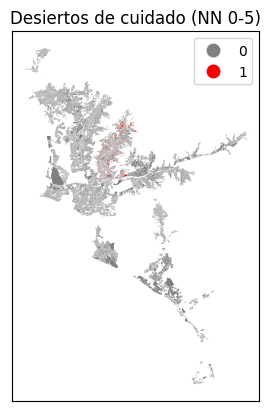

In [64]:
import matplotlib.colors

# Define a custom color map: red for 1, grey for 0
cmap = matplotlib.colors.ListedColormap(['grey', 'red'])

# Create a normalization object that maps your data values (0 and 1) to the colormap
norm = matplotlib.colors.BoundaryNorm([0, 0.5, 1], cmap.N)

fig, ax = plt.subplots(1, 1)

# Plot using the custom colormap and normalization
geopan.plot(column='desierto', ax=ax, legend=True, categorical=True, cmap=cmap, norm=norm)

# Remove longitude and latitude ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Desiertos de cuidado (NN 0-5)')

# Save the figure with high resolution
plt.savefig('desiertos_de_cuidado.png', format='png', dpi=1500)

plt.show()





## Opción 3: Tipología mixta (normativa+empírica) de desiertos de cuidado

Primero observemos las distribuciones de tiempos de viaje en el mapa.

In [70]:
bins = [0, 20, 40, 60, float('inf')]

# Define the labels for the bins
labels = ['0-20', '20-40', '40-60', '60+']

# Create the categorical variable
df['travel_time_category'] = pd.cut(df['duracion_a_centro_05'], bins=bins, labels=labels, include_lowest=True)

df.travel_time_category.value_counts()

travel_time_category
0-20     95419
60+       1485
20-40     1302
40-60      260
Name: count, dtype: int64

In [76]:
geopan = gpd.GeoDataFrame(df, geometry='geometry')

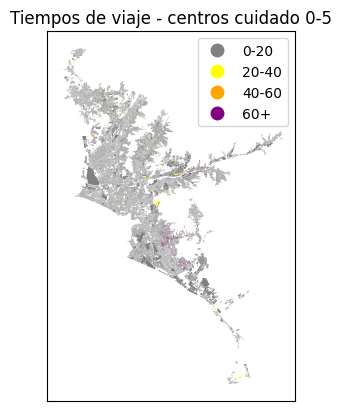

In [77]:
import matplotlib.colors

# Define a custom color map: red for 1, grey for 0
cmap = matplotlib.colors.ListedColormap(['grey', 'yellow', 'orange', 'purple'])

# Create a normalization object that maps your data values (0 and 1) to the colormap
norm = matplotlib.colors.BoundaryNorm([0, 1, 2, 3, 4], cmap.N)

fig, ax = plt.subplots(1, 1)

# Plot using the custom colormap and normalization
geopan.plot(column='travel_time_category', ax=ax, legend=True, categorical=True, cmap=cmap, norm=norm)

# Remove longitude and latitude ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Tiempos de viaje - centros cuidado 0-5')

# Save the figure with high resolution
plt.savefig('Tiempos de viaje_cat.png', format='png', dpi=1500)

plt.show()


Defino como zonas 'problemáticas' aquellas donde el tiempo caminando es mayor a 20 minutos (considerando que esta caminata se da cargando hijos pequeños). Un 3% de los territorios termina caracterizado como zona a prestarle atención.

In [75]:

df['desierto'] = (df['duracion_a_centro_05'] > 20).astype(int)
df.desierto.value_counts()

desierto
0    95419
1     3047
Name: count, dtype: int64

In [96]:
geopan = gpd.GeoDataFrame(df, geometry='geometry')

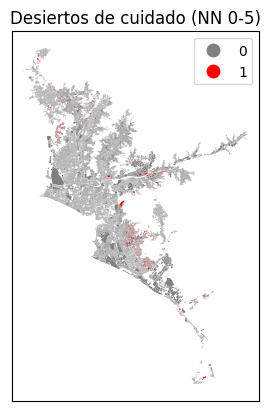

In [97]:
import matplotlib.colors

# Define a custom color map: red for 1, grey for 0
cmap = matplotlib.colors.ListedColormap(['grey', 'red'])

# Create a normalization object that maps your data values (0 and 1) to the colormap
norm = matplotlib.colors.BoundaryNorm([0, 0.5, 1], cmap.N)

fig, ax = plt.subplots(1, 1)

# Plot using the custom colormap and normalization
geopan.plot(column='desierto', ax=ax, legend=True, categorical=True, cmap=cmap, norm=norm)

# Remove longitude and latitude ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Desiertos de cuidado (NN 0-5)')

# Save the figure with high resolution
plt.savefig('desiertos_de_cuidado.png', format='png', dpi=1500)

plt.show()

Para clasificar la población, normalizamos la data y estudiamos criterios empíricos.

In [83]:
print(df.pob0a5_mz.median())
df.pob0a5_mz.describe()


7.0


count    98466.000000
mean        10.037170
std         14.173781
min          0.000000
25%          3.000000
50%          7.000000
75%         14.000000
max       1827.000000
Name: pob0a5_mz, dtype: float64

In [86]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['pob0a5_mz']  

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[columns_to_scale])



In [87]:
df["pob_0a5_mz_normal"]= df_scaled

In [89]:
df.pob_0a5_mz_normal.describe()

count    9.846600e+04
mean    -3.813721e-17
std      1.000005e+00
min     -7.081541e-01
25%     -4.964946e-01
50%     -2.142820e-01
75%      2.795902e-01
max      1.281925e+02
Name: pob_0a5_mz_normal, dtype: float64

Estudio tres posibilidades:

In [90]:
umbral1 = df.pob_0a5_mz_normal.mean()
umbral2 = df.pob_0a5_mz_normal.mean() + df.pob0a5_mz.std()
umbral3 = df.pob_0a5_mz_normal.median()

In [106]:
df['alta_demanda_1'] = (df['pob_0a5_mz_normal'] > umbral1).astype(int)
df['alta_demanda_2'] = (df['pob_0a5_mz_normal'] > umbral2).astype(int)
df['alta_demanda_3'] = (df['pob_0a5_mz_normal'] > umbral3).astype(int)

print(df.alta_demanda_1.value_counts())
print(df.alta_demanda_2.value_counts())
print(df.alta_demanda_3.value_counts())

alta_demanda_1
0    64135
1    34331
Name: count, dtype: int64
alta_demanda_2
0    98437
1       29
Name: count, dtype: int64
alta_demanda_3
0    52633
1    45833
Name: count, dtype: int64


Marcar como alta demanda los mayores a la media parece razonable - sumarle el SD reduce mucho las manzanas resultantes por la alta heterogeneidad del territorio.

In [110]:
df["desiert_demanda"] = df["desierto"] * df["alta_demanda_1"]
df.desiert_demanda.value_counts()

desiert_demanda
0    97759
1      707
Name: count, dtype: int64

Menos del 1% de las manzanas se clasifican como desiertos. Sin embargo, son fácilmente identificables en el mapa, lo cual resulta ventajoso para los hacedores de política.

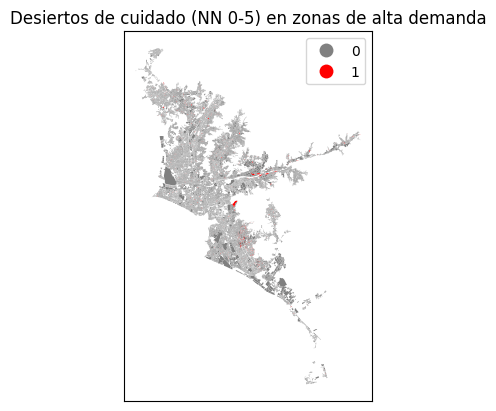

In [100]:
geopan = gpd.GeoDataFrame(df, geometry='geometry')

# Define a custom color map: red for 1, grey for 0
cmap = matplotlib.colors.ListedColormap(['grey', 'red'])

# Create a normalization object that maps your data values (0 and 1) to the colormap
norm = matplotlib.colors.BoundaryNorm([0, 0.5, 1], cmap.N)

fig, ax = plt.subplots(1, 1)

# Plot using the custom colormap and normalization
geopan.plot(column='desiert_demanda', ax=ax, legend=True, categorical=True, cmap=cmap, norm=norm)

# Remove longitude and latitude ticks
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Desiertos de cuidado (NN 0-5) en zonas de alta demanda')

# Save the figure with high resolution
plt.savefig('desiertos_de_cuidado_alta_demanda.png', format='png', dpi=1500)

plt.show()

In [113]:
df.drop(columns=["alta_demanda_2", "alta_demanda_2", 'travel_time_category'], inplace=True)
df.columns

Index(['geometry', 'pob0a5_mz', 'pob0a3_mz', 'pob4a5_mz',
       'distancia_a_centro_05', 'duracion_a_centro_05', 'Hogares', 'Población',
       'Estrato', 'desierto', 'pob_0a5_mz_normal', 'alta_demanda_1',
       'alta_demanda_3', 'desiert_demanda'],
      dtype='object')

In [114]:
geopan = gpd.GeoDataFrame(df, geometry='geometry')

In [115]:
geopan.columns

Index(['geometry', 'pob0a5_mz', 'pob0a3_mz', 'pob4a5_mz',
       'distancia_a_centro_05', 'duracion_a_centro_05', 'Hogares', 'Población',
       'Estrato', 'desierto', 'pob_0a5_mz_normal', 'alta_demanda_1',
       'alta_demanda_3', 'desiert_demanda'],
      dtype='object')

In [116]:
geopan.to_file('Desiertos de cuidado_0a5_Lima y Callao.shp', driver='ESRI Shapefile')


C:\Users\danid\AppData\Local\Temp\ipykernel_4912\3120084595.py:1: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.



In [117]:
geopan.to_file('Desiertos cuidado 0a5.geojson', driver='GeoJSON')
